# Fourier transforms and Time-Frequency analyses

Note: if you go up to the dropdown box up top and switch to "Markdown" you can start typing normal text. That being said, great job commenting the code!

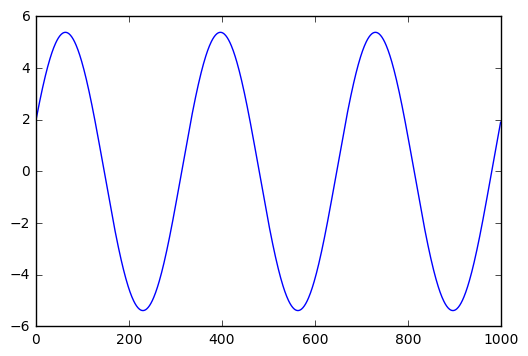

In [1]:
#Make code more friendly for graphs containing multiple waves
import matplotlib.pyplot as plot
import numpy as np

sr = 1000 #This represents the sample rate
Hz = 3 # This represents the frequency
x = np.arange(sr) # This is for the x axis of the graph 
y = 4.0*np.sin(2*np.pi*Hz*(x/sr)) +  np.sin(2*np.pi*Hz*(x/sr)) +  2.0*np.cos(2*np.pi*Hz*(x/sr)) #This is the function for our graph sin(2*pi*frequency*time)
% matplotlib inline
plot.plot(x,y)

In [2]:
import matplotlib.pyplot as plot
import numpy as np
 
sr = 100 #This represents the sample rate
Hz = 30 # This represents the frequency, redund
x = np.arange(sr) # This is for the x axis of the graph 
y = 4.0*np.sin(2*np.pi*54*(x/sr)) +  np.sin(2*np.pi*12*(x/sr)) +  2.0*np.cos(2*np.pi*41*(x/sr)) #This is the function for our graph sin(2*pi*frequency*time)

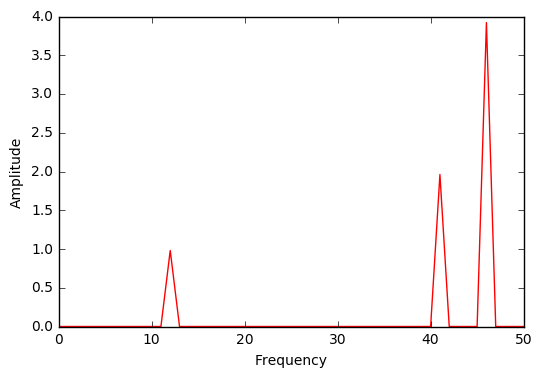

In [3]:
fft_output = np.fft.rfft(y)
Amplitude = [np.sqrt(i.real**2 + i.imag**2)/len(fft_output) for i in fft_output]
Fq = [(i*1.0/100)*sr for i in range(100//2+1)]
plot.xlabel('Frequency')
plot.ylabel('Amplitude')
plot.plot(Fq, Amplitude, 'r')

## A non-stationary signal

Next up is a challenge: here's a signal that we know doesn't "stay the same" throughout the whole time we're collecting data.

We'll take this in two steps:

* Do FFT of whole segment
* Do Spectrogram (a type of short-time fourier transform) of the whole segment


C:\Users\C\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\C\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


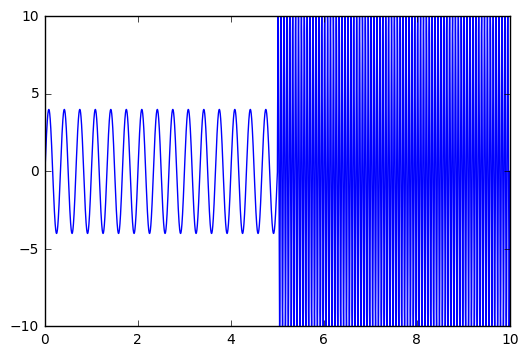

In [4]:
sr = 1000 #This represents the sample rate
sec_col = 10 #this is the number of seconds collected
#So, the total number of samples we collect is 1000 samples/second * 10 seconds
bsize = sr * sec_col

first_wave = 3 # This represents the frequency
x = np.linspace(0,sec_col,bsize)

y = 4.0*np.sin(2*np.pi*first_wave*x)
second_wave = 16
y[bsize/2:] = np.zeros(bsize/2) #we're going to zero out half of the y we just computed
y[bsize/2:] = 10 * np.sin(2 * np.pi * second_wave * x[bsize/2:])

% matplotlib inline
plot.plot(x,y)

[0, 30, 0, 10]

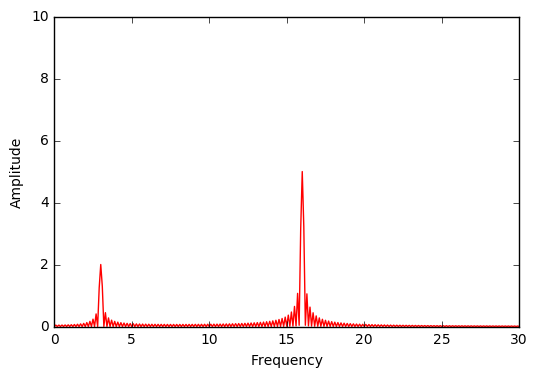

In [5]:
fft_output = np.fft.rfft(y)
Amplitude = [np.sqrt(i.real**2 + i.imag**2)/len(fft_output) for i in fft_output]
Fq = [(i*1.0/bsize)*sr for i in range(bsize//2+1)] 
plot.xlabel('Frequency')
plot.ylabel('Amplitude')
plot.plot(Fq, Amplitude, 'r')

plot.axis([0,30,0,10])

#Only recovers half of the amplitude. Needs Revision.

The FFT made here shows the frequency of the the wave but it does not give a time domain. For that, the spectrogram would be used, however...

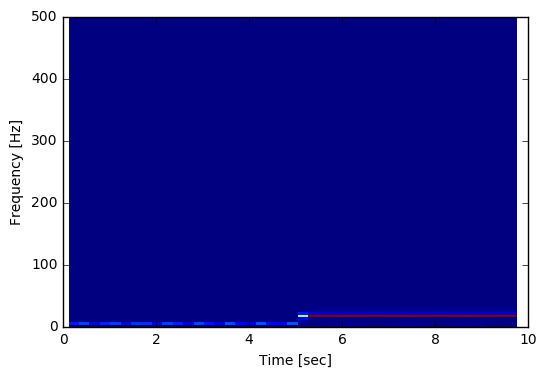

In [15]:
from scipy import signal

f, t, Sxx = signal.spectrogram(y,sr)
plot.pcolormesh(t, f, Sxx)
plot.ylabel('Frequency [Hz]')
plot.xlabel('Time [sec]')
plot.show()

Thats still very much a work in progress.